# JAX-GCM (JCM) Demo 

<img src="../logo.png" alt="JAX-GCM Logo" width="200"/>

This notebook demonstrates the capabilities of JAX-GCM (JCM), a differentiable general circulation model built using JAX. 

We will showcase how to set up a simple atmospheric simulation, run the model, and visualize the results. Additionally, we will illustrate how to compute gradients with respect to model parameters using JAX's automatic differentiation features.



In [1]:
import os, pathlib
print("PWD:", os.getcwd())
print("repo root guess:", pathlib.Path(".").resolve())



PWD: /home/gmathieu/src/jax-gcm/notebooks
repo root guess: /home/gmathieu/src/jax-gcm/notebooks


In [2]:
from jcm.model import Model
from jcm.geometry import Geometry
from jcm.forcing import ForcingData

# Load the terrain and forcing data (interpolated to the default model grid)
realistic_geometry = Geometry.from_file('../jcm/data/bc/t30/clim/terrain.nc', target_resolution=31)
realistic_forcing = ForcingData.from_file('../jcm/data/bc/t30/clim/forcing.nc', target_resolution=31)

W0211 14:57:00.556895   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:57:00.642553   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:57:00.680671   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:57:00.771452   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:57:00.846789   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:57:00.897742   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:57:00.953803   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. 

In [3]:
model = Model(
    geometry=realistic_geometry,
)

predictions = model.run(
    save_interval=5,
    total_time=30,
    output_averages=True,
    forcing=realistic_forcing,
)

pred_ds = predictions.to_xarray()
pred_ds

W0211 14:57:05.174759   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:57:05.217445   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:57:05.258091   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:57:05.298332   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:57:05.324152   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:57:05.374234   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:57:05.423575   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. 

<xarray.Dataset> Size: 22MB
Dimensions:                          (time: 6, level: 8, lon: 96, lat: 48)
Coordinates:
  * time                             (time) datetime64[ns] 48B 2000-01-01 ......
  * level                            (level) float32 32B 0.95 0.835 ... 0.025
  * lon                              (lon) float64 768B 0.0 3.75 ... 352.5 356.2
  * lat                              (lat) float64 384B -87.16 -83.48 ... 87.16
Data variables: (12/79)
    convection.se                    (time, level, lon, lat) float32 885kB ...
    surface_flux.shf.2               (time, lon, lat) float32 111kB ...
    shortwave_rad.rsds               (time, lon, lat) float32 111kB ...
    convection.iptop                 (time, lon, lat) float32 111kB ...
    convection.precnv                (time, lon, lat) float32 111kB ...
    condensation.dqlsc               (time, level, lon, lat) float32 885kB ...
    ...                               ...
    shortwave_rad.cloudc             (time, lon, lat) float32 111kB ...
    surface_flux.tskin               (time, lon, lat) float32 111kB ...
    u_wind                           (time, level, lon, lat) float32 885kB ...
    mod_radcon.alb_s                 (time, lon, lat) float32 111kB ...
    shortwave_rad.dfabs              (time, level, lon, lat) float32 885kB ...
    shortwave_rad.zenit              (time, lon, lat) float32 111kB ...

In [4]:
import xarray as xr
import numpy as np

ERA5_PATH = "/home/gmathieu/links/scratch/era5_snapshot/era5_19900501T00.nc"

ds_era = xr.open_dataset(ERA5_PATH)

ds_era


<xarray.Dataset> Size: 3GB
Dimensions:                              (latitude: 721, longitude: 1440,
                                          hybrid: 137)
Coordinates:
  * latitude                             (latitude) float32 3kB 90.0 ... -90.0
  * longitude                            (longitude) float32 6kB 0.0 ... 359.8
  * hybrid                               (hybrid) float32 548B 1.0 2.0 ... 137.0
    time                                 datetime64[ns] 8B ...
Data variables:
    surface_pressure                     (latitude, longitude) float32 4MB ...
    geopotential_at_surface              (latitude, longitude) float32 4MB ...
    u_component_of_wind                  (hybrid, latitude, longitude) float32 569MB ...
    v_component_of_wind                  (hybrid, latitude, longitude) float32 569MB ...
    temperature                          (hybrid, latitude, longitude) float32 569MB ...
    specific_humidity                    (hybrid, latitude, longitude) float32 569MB ...
    specific_cloud_liquid_water_content  (hybrid, latitude, longitude) float32 569MB ...
    specific_cloud_ice_water_content     (hybrid, latitude, longitude) float32 569MB ...
Attributes:
    last_updated:           2026-02-04 01:58:18.769407+00:00
    valid_time_start:       1940-01-01
    valid_time_stop:        2025-10-31
    valid_time_stop_era5t:  2026-01-29

In [5]:
def to_180(lon):
    return ((lon + 180) % 360) - 180

# ERA5 parfois en 0-360
if ds_era.longitude.max() > 180:
    ds_era = ds_era.assign_coords(longitude=to_180(ds_era.longitude)).sortby("longitude")


In [6]:
def lowest(da):
    for d in ["hybrid", "level", "lev", "model_level", "pressure_level", "isobaricInhPa"]:
        if d in da.dims:
            return da.isel({d: -1})
    return da

era_ps = lowest(ds_era["surface_pressure"])
era_T  = lowest(ds_era["temperature"])
era_u  = lowest(ds_era["u_component_of_wind"])
era_v  = lowest(ds_era["v_component_of_wind"])

# enlever temps si présent
if "time" in era_ps.dims:
    era_ps = era_ps.isel(time=0)
    era_T  = era_T.isel(time=0)
    era_u  = era_u.isel(time=0)
    era_v  = era_v.isel(time=0)


In [8]:
# dernier temps
pred = pred_ds.isel(time=-1)

# niveau bas
pred = pred.isel(level=-1)

pred

W0211 14:58:53.317589   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:58:53.367159   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:58:53.395223   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:58:53.442701   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:58:53.489175   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:58:53.589271   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.


<xarray.Dataset> Size: 1MB
Dimensions:                          (lon: 96, lat: 48)
Coordinates:
  * lon                              (lon) float64 768B 0.0 3.75 ... 352.5 356.2
  * lat                              (lat) float64 384B -87.16 -83.48 ... 87.16
    level                            float32 4B 0.025
    time                             datetime64[ns] 8B 2000-01-26
Data variables: (12/79)
    convection.se                    (lon, lat) float32 18kB ...
    surface_flux.shf.2               (lon, lat) float32 18kB ...
    shortwave_rad.rsds               (lon, lat) float32 18kB ...
    convection.iptop                 (lon, lat) float32 18kB ...
    convection.precnv                (lon, lat) float32 18kB ...
    condensation.dqlsc               (lon, lat) float32 18kB ...
    ...                               ...
    shortwave_rad.cloudc             (lon, lat) float32 18kB ...
    surface_flux.tskin               (lon, lat) float32 18kB ...
    u_wind                           (lon, lat) float32 18kB ...
    mod_radcon.alb_s                 (lon, lat) float32 18kB ...
    shortwave_rad.dfabs              (lon, lat) float32 18kB ...
    shortwave_rad.zenit              (lon, lat) float32 18kB ...

In [9]:
# Interp ERA5 -> grille modèle
era_ps_i = era_ps.interp(latitude=pred["lat"], longitude=pred["lon"])
era_T_i  = era_T .interp(latitude=pred["lat"], longitude=pred["lon"])
era_u_i  = era_u .interp(latitude=pred["lat"], longitude=pred["lon"])
era_v_i  = era_v .interp(latitude=pred["lat"], longitude=pred["lon"])

# Maintenant, selon xarray, les dims peuvent déjà être ('lat','lon') ou rester ('latitude','longitude').
# On harmonise *uniquement si nécessaire*.

def ensure_latlon(da):
    if ("lat" in da.dims) and ("lon" in da.dims):
        return da
    if ("latitude" in da.dims) and ("longitude" in da.dims):
        return da.rename({"latitude":"lat", "longitude":"lon"})
    raise ValueError(f"Dims inattendues: {da.dims}")

era_ps_i = ensure_latlon(era_ps_i)
era_T_i  = ensure_latlon(era_T_i)
era_u_i  = ensure_latlon(era_u_i)
era_v_i  = ensure_latlon(era_v_i)

era_ps_i.dims, era_ps_i.shape



(('lat', 'lon'), (48, 96))

In [10]:
print("pred lat/lon dims:", pred["lat"].dims, pred["lon"].dims)
print("era_ps_i dims:", era_ps_i.dims)
print("pred_ds coords:", [c for c in pred_ds.coords])


pred lat/lon dims: ('lat',) ('lon',)
era_ps_i dims: ('lat', 'lon')
pred_ds coords: ['lon', 'lat', 'level', 'time']


In [11]:
sorted([v for v in pred_ds.data_vars if "normalized" in v])[:50], len([v for v in pred_ds.data_vars if "normalized" in v])


(['normalized_surface_pressure'], 1)

In [12]:
[v for v in pred_ds.data_vars if "normalized" in v and any(k in v for k in ["pressure","temperature","u","v","wind"])]


['normalized_surface_pressure']

In [13]:
import numpy as np
import xarray as xr

def find_keys_like(ds, substrings):
    out = []
    for v in list(ds.data_vars) + list(ds.coords):
        lv = str(v).lower()
        if any(s in lv for s in substrings):
            out.append(v)
    for k in ds.attrs.keys():
        lk = str(k).lower()
        if any(s in lk for s in substrings):
            out.append(f"attr:{k}")
    return sorted(set(out))

print("Candidates stats:", find_keys_like(pred_ds, ["mean", "std", "sigma", "mu", "normal"]))


Candidates stats: ['normalized_surface_pressure']


In [14]:
import numpy as np
import xarray as xr

p0 = 1e5  # Pa

pred = pred_ds.isel(time=-1, level=-1)
ps_pred = pred["normalized_surface_pressure"] * p0
ps_pred.name = "surface_pressure_pred"
ps_pred


W0211 14:59:13.885468   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:59:13.933918   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:59:14.040318   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.


<xarray.DataArray 'surface_pressure_pred' (lon: 96, lat: 48)> Size: 18kB
Array([[ 74703.55 ,  78915.24 ,  74890.61 , ..., 106468.86 , 106247.17 ,
        106339.56 ],
       [ 74125.42 ,  77537.24 ,  72871.12 , ..., 106714.68 , 106481.9  ,
        106333.83 ],
       [ 73546.13 ,  76257.73 ,  71195.58 , ..., 106479.766, 106541.77 ,
        106308.72 ],
       ...,
       [ 76390.805,  83496.41 ,  82870.414, ..., 102053.98 , 104460.52 ,
        106246.92 ],
       [ 75840.42 ,  81915.58 ,  79928.08 , ..., 104152.72 , 105226.01 ,
        106294.74 ],
       [ 75276.586,  80380.53 ,  77251.336, ..., 105632.21 , 105827.46 ,
        106326.19 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 768B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
  * lat      (lat) float64 384B -87.16 -83.48 -79.78 ... 79.78 83.48 87.16
    level    float32 4B 0.025
    time     datetime64[ns] 8B 2000-01-26
Attributes:
    units:        1
    description:  normalized surface pressure

In [16]:
import numpy as np
import xarray as xr

ps_pred, era_ps_i2 = xr.align(ps_pred, era_ps_i, join="exact")

rmse_pa  = float(np.sqrt(((ps_pred - era_ps_i2) ** 2).mean()))
rmse_hpa = rmse_pa / 100.0

print("RMSE surface pressure:", rmse_hpa, "hPa")


RMSE surface pressure: 38.695263671875 hPa


W0211 15:00:04.458310   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 15:00:04.485042   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 15:00:04.542137   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.


In [17]:
diff = ps_pred - era_ps_i2
print("pred ps min/max (hPa):", float(ps_pred.min()/100), float(ps_pred.max()/100))
print("era  ps min/max (hPa):", float(era_ps_i2.min()/100), float(era_ps_i2.max()/100))
print("mean bias (hPa):", float(diff.mean()/100))
print("std of error (hPa):", float(diff.std()/100))


W0211 15:04:01.766851   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 15:04:01.842078   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 15:04:01.893736   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.


pred ps min/max (hPa): 533.2718505859375 1107.2265625
era  ps min/max (hPa): 515.5892511245949 1038.28265625
mean bias (hPa): 22.35204315185547
std of error (hPa): 31.58654022216797


W0211 15:04:01.994864   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.


In [18]:
print("ERA5 file:", ERA5_PATH)
print("ERA5 times:", ds_era.get("time", None))
print("pred times:", pred_ds["time"].values[:5], "...", pred_ds["time"].values[-1])


ERA5 file: /home/gmathieu/links/scratch/era5_snapshot/era5_19900501T00.nc
ERA5 times: <xarray.DataArray 'time' ()> Size: 8B
[1 values with dtype=datetime64[ns]]
Coordinates:
    time     datetime64[ns] 8B ...
pred times: ['2000-01-01T00:00:00.000000000' '2000-01-06T00:00:00.000000000'
 '2000-01-11T00:00:00.000000000' '2000-01-16T00:00:00.000000000'
 '2000-01-21T00:00:00.000000000'] ... 2000-01-26T00:00:00.000000000


In [19]:
print("pred grid lon range:", float(pred_ds.lon.min()), float(pred_ds.lon.max()), "n=", pred_ds.dims["lon"])
print("pred grid lat range:", float(pred_ds.lat.min()), float(pred_ds.lat.max()), "n=", pred_ds.dims["lat"])

print("ERA5 lon range:", float(ds_era.longitude.min()), float(ds_era.longitude.max()), "n=", ds_era.dims["longitude"])
print("ERA5 lat range:", float(ds_era.latitude.min()), float(ds_era.latitude.max()), "n=", ds_era.dims["latitude"])


pred grid lon range: 0.0 356.25 n= 96
pred grid lat range: -87.15909455586285 87.15909455586285 n= 48
ERA5 lon range: -180.0 179.75 n= 1440
ERA5 lat range: -90.0 90.0 n= 721


/tmp/ipykernel_90214/3276733544.py:1: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print("pred grid lon range:", float(pred_ds.lon.min()), float(pred_ds.lon.max()), "n=", pred_ds.dims["lon"])
/tmp/ipykernel_90214/3276733544.py:2: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print("pred grid lat range:", float(pred_ds.lat.min()), float(pred_ds.lat.max()), "n=", pred_ds.dims["lat"])
/tmp/ipykernel_90214/3276733544.py:4: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To acce

In [20]:
diff = ps_pred - era_ps_i2
bias = diff.mean(dim=("lat","lon"))
rmse_debiased = float(np.sqrt(((diff - bias)**2).mean())) / 100.0
print("RMSE ps debiased (hPa):", rmse_debiased)
print("bias (hPa):", float(bias/100.0))


RMSE ps debiased (hPa): 31.58654052734375
bias (hPa): 22.35204315185547


W0211 15:08:23.740744   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 15:08:23.815747   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 15:08:23.841366   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 15:08:23.887997   90214 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.


In [4]:
# dernier temps
pred = pred_ds.isel(time=-1)

# niveau bas
pred = pred.isel(level=-1)

pred


W0211 14:07:57.405453   65262 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:07:57.454532   65262 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:07:57.482666   65262 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:07:57.530016   65262 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:07:57.567645   65262 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0211 14:07:57.676525   65262 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.


<xarray.Dataset> Size: 1MB
Dimensions:                          (lon: 96, lat: 48)
Coordinates:
  * lon                              (lon) float64 768B 0.0 3.75 ... 352.5 356.2
  * lat                              (lat) float64 384B -87.16 -83.48 ... 87.16
    level                            float32 4B 0.025
    time                             datetime64[ns] 8B 2000-01-26
Data variables: (12/79)
    geopotential                     (lon, lat) float32 18kB ...
    surface_flux.vstr.1              (lon, lat) float32 18kB ...
    surface_flux.evap.1              (lon, lat) float32 18kB ...
    condensation.dqlsc               (lon, lat) float32 18kB ...
    shortwave_rad.ozone              (lon, lat) float32 18kB ...
    longwave_rad.ftop                (lon, lat) float32 18kB ...
    ...                               ...
    mod_radcon.tau2.2                (lon, lat) float32 18kB ...
    surface_flux.v0                  (lon, lat) float32 18kB ...
    surface_flux.shf.2               (lon, lat) float32 18kB ...
    surface_flux.rlus.1              (lon, lat) float32 18kB ...
    condensation.dtlsc               (lon, lat) float32 18kB ...
    condensation.precls              (lon, lat) float32 18kB ...

W0210 17:17:28.283786 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:17:28.330511 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:17:28.356881 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.


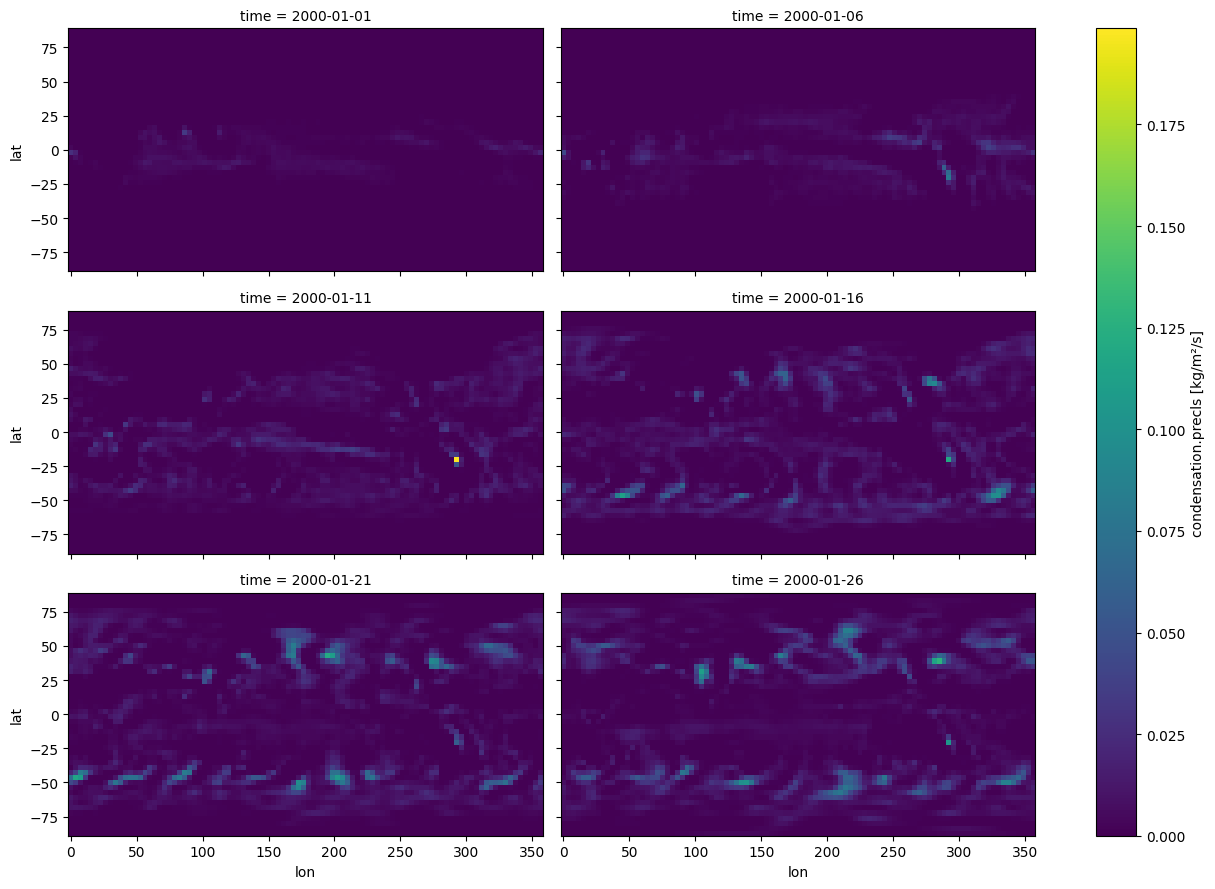

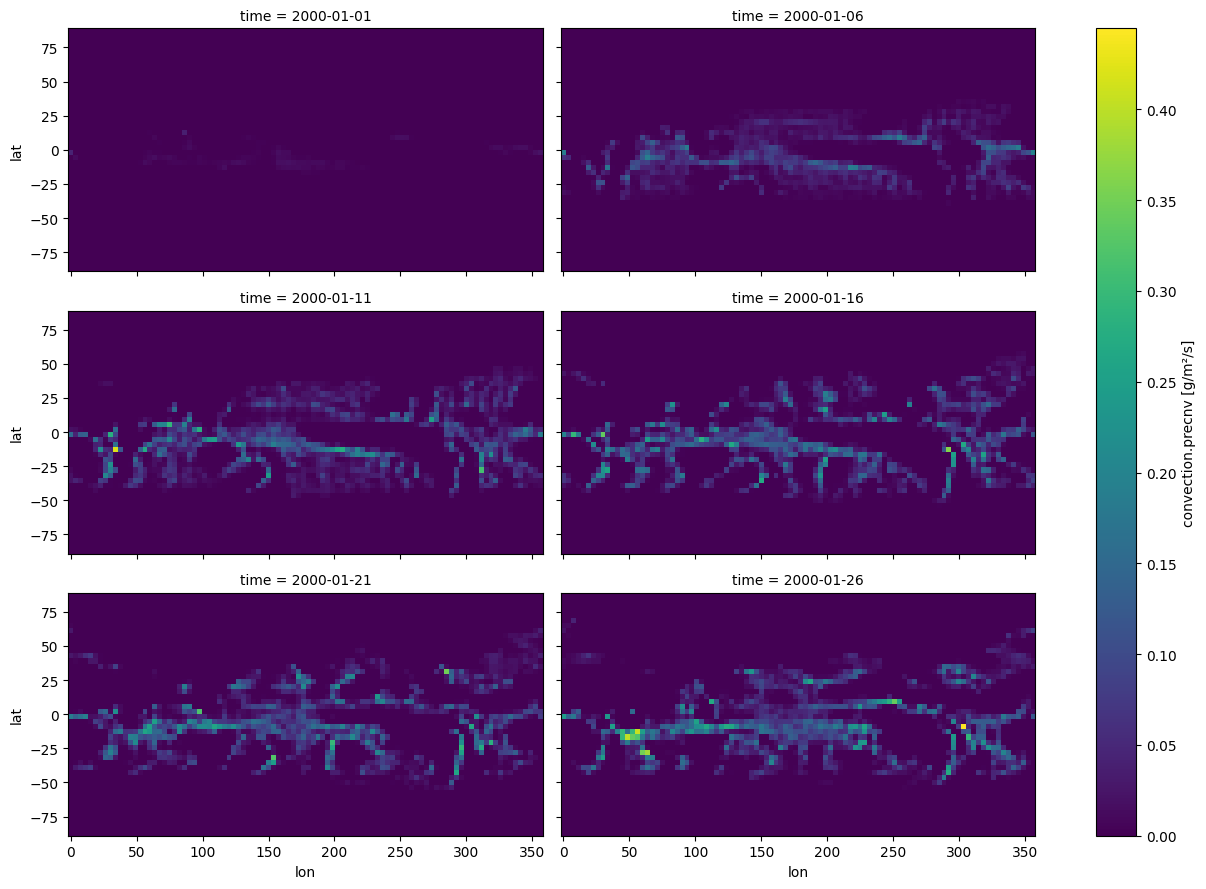

In [4]:
pred_ds['condensation.precls'].plot(x='lon', y='lat', col='time', col_wrap=2, aspect=2)
pred_ds['convection.precnv'].plot(x='lon', y='lat', col='time', col_wrap=2, aspect=2)

W0210 17:17:29.740880 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:17:29.807934 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:17:29.881780 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:17:29.927821 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:17:30.107110 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:17:30.154008 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.


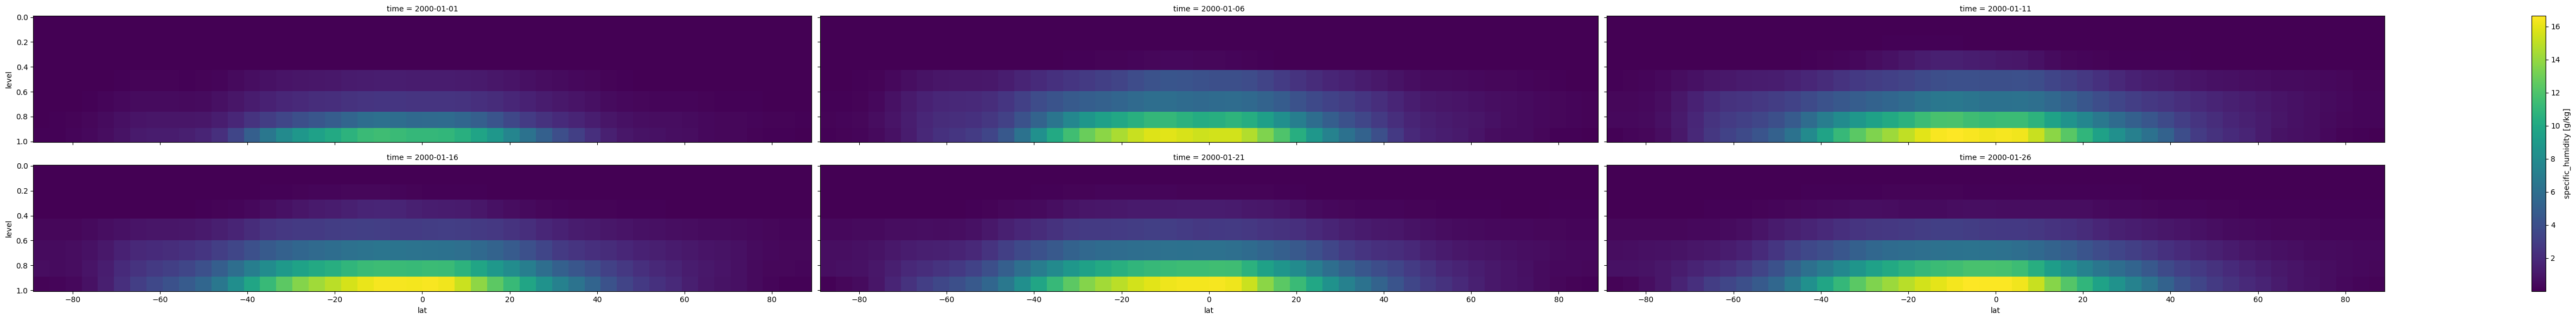

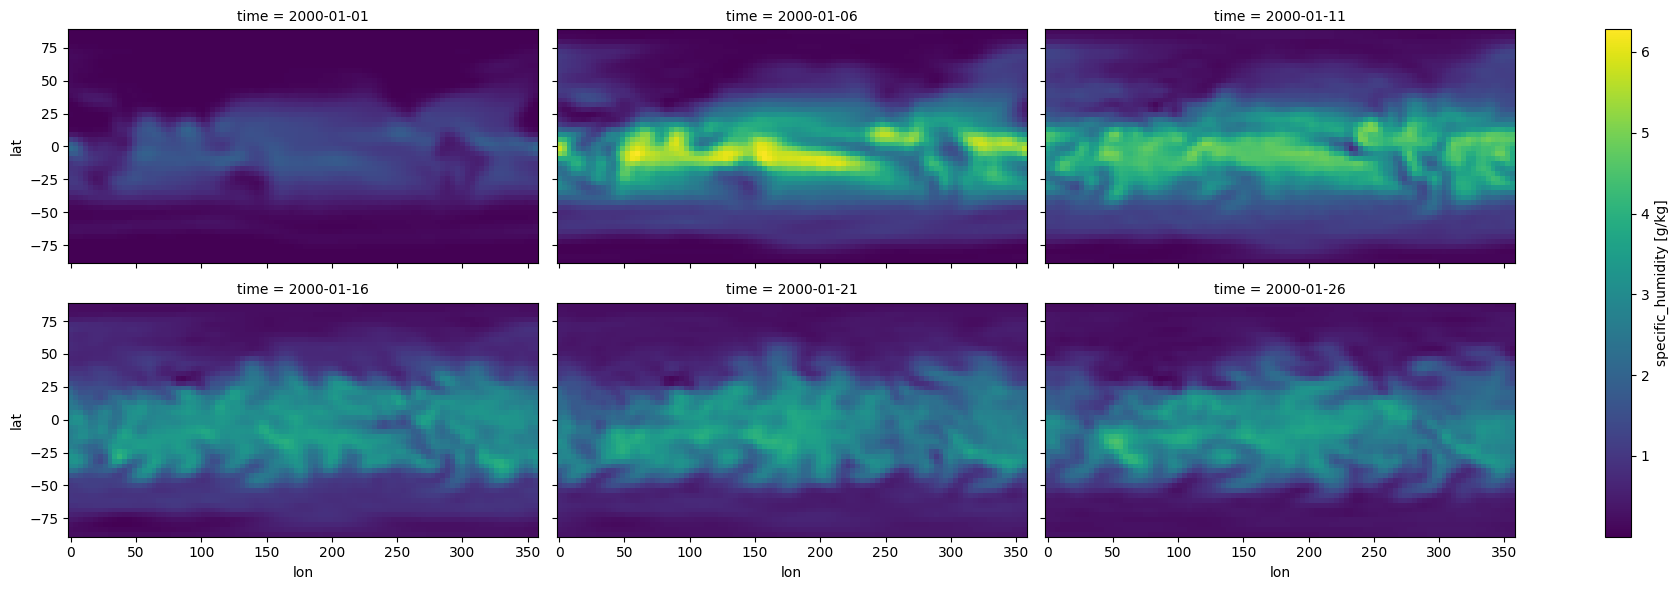

In [5]:
pred_ds['specific_humidity'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=3, aspect=6, yincrease=False)
pred_ds['specific_humidity'].isel(level=3).plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)

### Clouds!

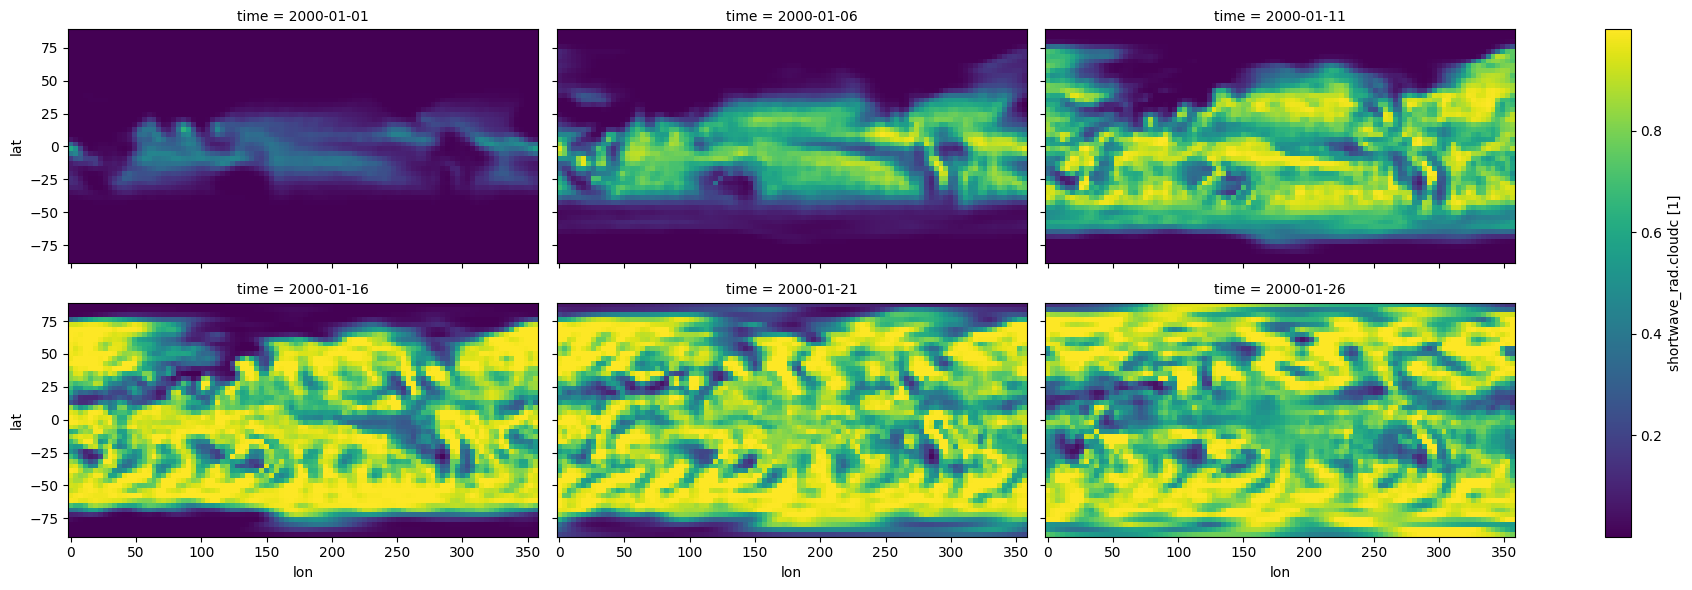

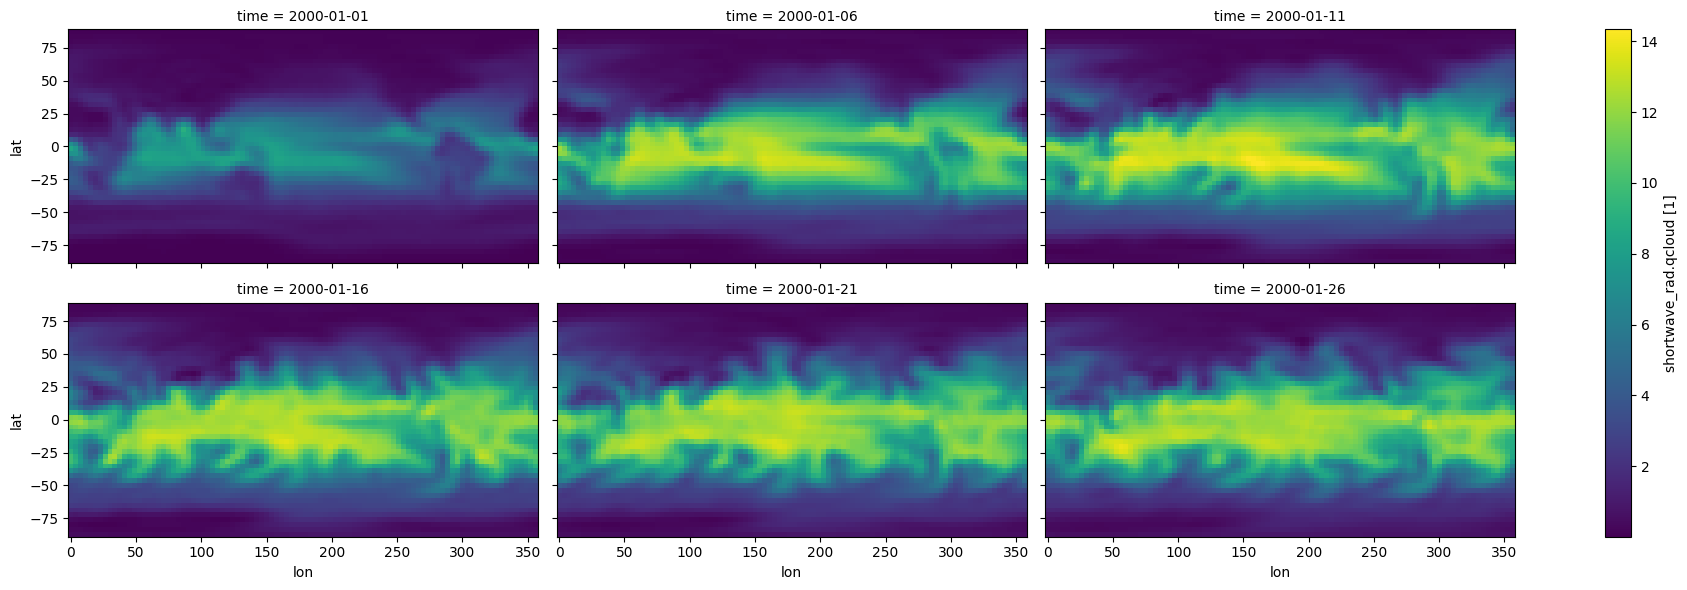

In [6]:
pred_ds['shortwave_rad.cloudc'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)
pred_ds['shortwave_rad.qcloud'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)

## Continue running

Continue a simulation from the previous state for an additional 30 days, saving every 5 days and outputting averages.


In [7]:
predictions = model.resume(
    total_time=30,
    output_averages=True,
    forcing=realistic_forcing,
)

W0210 17:17:59.203244 3519095 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:17:59.217748 3519095 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:17:59.231432 3519095 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:18:03.026867 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.


In [11]:
ds = predictions.to_xarray() if hasattr(predictions, "to_xarray") else predictions
print(ds)
print("vars:", list(ds.data_vars))


W0210 17:23:10.669037 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:23:10.721319 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:23:10.750401 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:23:10.803576 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:23:10.853004 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:23:10.888602 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:23:10.944017 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. 

<xarray.Dataset> Size: 11MB
Dimensions:                          (time: 3, lon: 96, lat: 48, level: 8)
Coordinates:
  * time                             (time) datetime64[ns] 24B 2000-01-31 ......
  * lon                              (lon) float64 768B 0.0 3.75 ... 352.5 356.2
  * lat                              (lat) float64 384B -87.16 -83.48 ... 87.16
  * level                            (level) float32 32B 0.95 0.835 ... 0.025
Data variables: (12/79)
    shortwave_rad.gse                (time, lon, lat) float32 55kB ...
    shortwave_rad.qcloud             (time, lon, lat) float32 55kB ...
    date.model_step                  (time) float32 12B ...
    surface_flux.rlns                (time, lon, lat) float32 55kB ...
    surface_flux.vstr.0              (time, lon, lat) float32 55kB ...
    shortwave_rad.cloudstr           (time, lon, lat) float32 55kB ...
    ...                               ...
    surface_flux.ustr.1              (time, lon, lat) float32 55kB ...
    shortwav

W0210 17:23:11.011446 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.


In [12]:
for v in ["temperature", "u_wind", "v_wind", "normalized_surface_pressure"]:
    a = ds[v]
    print(v, "dims=", a.dims, "shape=", a.shape, "dtype=", a.dtype)
    print("  attrs:", {k:a.attrs[k] for k in a.attrs if k in ["units","long_name","standard_name"]})


temperature dims= ('time', 'level', 'lon', 'lat') shape= (3, 8, 96, 48) dtype= float32
  attrs: {'units': 'K'}
u_wind dims= ('time', 'level', 'lon', 'lat') shape= (3, 8, 96, 48) dtype= float32
  attrs: {'units': 'm/s'}
v_wind dims= ('time', 'level', 'lon', 'lat') shape= (3, 8, 96, 48) dtype= float32
  attrs: {'units': 'm/s'}
normalized_surface_pressure dims= ('time', 'lon', 'lat') shape= (3, 96, 48) dtype= float32
  attrs: {'units': '1'}


Sometimes, for example in a coupled run we want a pure JAX interface to enable compilation of a larger model. We can do this using the `run_from_state` method:

```python
model.run_from_state(
    initial_state=model._final_modal_state,
    total_time=30,
    output_averages=True,
    forcing=realistic_forcing,
)
```

## Note on speed and efficiency

Some preliminary tests show very good performance on a variety of devices but especially on GPUs and TPUs. For example, on a V100 GPU we see around 10x speedup compared to a CPU run. JCM also supports parallelization across multiple devices using JAX's `pmap` functionality, which can further enhance performance for large-scale simulations.

<center><img src="jcm_scaling.png" alt="JCM Performance" width="400"/></center>

## Model Gradients

We can compute gradients of model outputs with respect to model parameters using JAX's automatic differentiation. 

In [8]:
import jax
import jax.numpy as jnp
import jax.tree_util as jtu
from jcm.physics.speedy.speedy_physics import SpeedyPhysics
from jcm.physics.speedy.params import Parameters

# Key step - create a function that makes a model given parameters
def model_run_wrapper(params):
    model = Model(geometry=realistic_geometry, physics=SpeedyPhysics(parameters=params))

    return model.run(save_interval=1, total_time=1, forcing=realistic_forcing, output_averages=True)

In [9]:
# VJP is the vector-Jacobian product and calculates the gradient of outputs with respect to inputs

primal, vjp_fn = jax.vjp(model_run_wrapper, Parameters.default())

W0210 17:19:18.660725 3519097 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:19:18.675742 3519097 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:19:18.689810 3519097 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:19:18.703371 3519097 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:19:18.716872 3519097 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:19:18.730350 3519097 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:19:18.743946 3519097 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. 

In [10]:
def create_cotangent(primal):
    cotangent = jtu.tree_map(jnp.zeros_like, primal)
    cotangent.physics.shortwave_rad.ftop = jtu.tree_map(jnp.ones_like, cotangent.physics.shortwave_rad.ftop)
    return cotangent

grad, = vjp_fn(create_cotangent(primal))

W0210 17:21:27.087667 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:21:27.136636 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:21:27.184027 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:21:27.230172 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:21:27.276333 3519038 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:21:39.920610 3519098 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. Using default config.
W0210 17:21:39.936063 3519098 sol_gpu_cost_model.cc:102] No SoL config found for device: NVIDIA H100 80GB HBM3 MIG 2g.20gb. 

In [12]:
print(grad)

Parameters(convection=ConvectionParameters(psmin=0.0,
                                           trcnv=0.0,
                                           rhil=0.0,
                                           rhbl=0.0,
                                           entmax=0.0,
                                           smf=0.0),
           condensation=CondensationParameters(trlsc=0.0,
                                               rhlsc=0.0,
                                               drhlsc=0.0,
                                               rhblsc=0.0),
           shortwave_radiation=ShortwaveRadiationParameters(albcl=-0.034563131630420685,
                                                            albcls=-502230.5625,
                                                            absdry=1004539.0625,
                                                            absaer=297534.34375,
                                                            abswv1=159370.4375,
                               

We can also calculate the Jacobian-vector product (JVP) to get gradients of specific outputs with respect to a parameter

In [ ]:
# Define a tangent vector for JVP
params = Parameters.default()
tangent = Parameters.zeros()
tangent.mod_radcon.albsea = jnp.array(1.)

y, jvp_at_x = jax.jvp(model_run_wrapper, (params,), (tangent,))

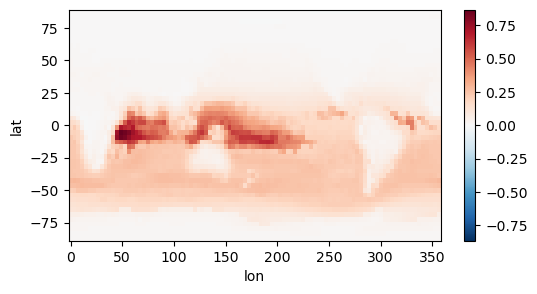

In [ ]:
import xarray as xr
xr.DataArray(jvp_at_x.physics.surface_flux.hfluxn[0, :, :, 0], dims=['lon', 'lat'],
                coords={'lat': pred_ds.lat, 'lon': pred_ds.lon}).plot(x='lon', y='lat', size=3, aspect=2)

## Advanced

Sometimes it can be useful to control the compilation or execution of the JAX code more directly. JAX has configuration functions to facilitate this.

In [ ]:
print("JAX device:", jax.devices())

# import os
# os.environ["JAX_PLATFORM_NAME"] = "cpu"  # for use on ARM Macs

jax.config.update('jax_disable_jit', False) # disable if necessary for debugging
jax.config.update("jax_debug_infs", True) # watch for model blowup
jax.config.update("jax_debug_nans", False) # some physics fields might be nan